In [122]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,average_precision_score,roc_curve
from sklearn.model_selection import StratifiedKFold,GridSearchCV
from data_treat.get_ready_data import get_data
from data_treat.data_normalizer import CustomNormalizer
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [138]:
COLUMNS = ["distance_from_home","distance_from_last_transaction","ratio_to_median_purchase_price",
           "repeat_retailer","used_chip","used_pin_number","online_order","fraud"]

In [145]:
def feture_importants(importantance):
    res = ''
    for ind, imp in enumerate(importantance):
        res += f"{COLUMNS[ind]} :  {imp}\n"

    return res

In [123]:
data = get_data()

In [124]:
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
302527,323.912847,0.124583,3.619145,1.0,0.0,0.0,1.0,1.0
91188,31.316131,1.287664,1.430220,1.0,0.0,1.0,1.0,0.0
72049,38.929655,0.028095,0.090335,1.0,1.0,0.0,0.0,0.0
49381,61.792623,0.109078,0.835203,1.0,1.0,0.0,1.0,0.0
882418,13.408338,2.118004,4.484699,1.0,0.0,0.0,1.0,1.0


In [125]:
data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,174806.000000,174806.000000,174806.000000,174806.000000,174806.000000,174806.000000,174806.000000,174806.000000
mean,44.596086,8.502264,3.713906,0.881383,0.308216,0.057916,0.784327,0.500000
std,104.753108,36.772105,4.755045,0.323338,0.461758,0.233585,0.411290,0.500001
min,0.021322,0.000407,0.011373,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.137164,0.309630,0.690949,1.000000,0.000000,0.000000,1.000000,0.000000
50%,11.754798,1.063041,2.006738,1.000000,0.000000,0.000000,1.000000,0.500000
75%,37.594545,3.811184,5.236790,1.000000,1.000000,0.000000,1.000000,1.000000
max,10632.723672,2160.499922,266.689692,1.000000,1.000000,1.000000,1.000000,1.000000


Based from the describe above, we can see that we need to normalize the data

In [126]:
data.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

We can see from above that the data is all in int/float format. Now we check if there are any null value

In [127]:
data.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

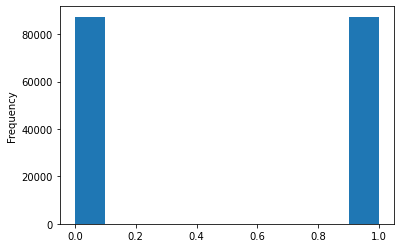

In [128]:
data['fraud'].plot(kind='hist')

In [129]:
#X = data.iloc[:,:-1]
#y = data.iloc[:,-1]

In [130]:
X.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
25108,24.324026,1.941513,0.092367,1.0,1.0,0.0,1.0
23497,35.339695,0.649863,0.491519,1.0,0.0,0.0,1.0
484340,33.144255,1.829466,5.957943,1.0,1.0,0.0,1.0
23032,15.539678,0.055214,0.189555,1.0,0.0,0.0,1.0
63258,1.307463,0.089430,0.585809,0.0,0.0,0.0,1.0


In [131]:
target_variable_name = 'fraud'
labels = data[target_variable_name]
data = data.drop(target_variable_name, axis=1)

In [132]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=.20,random_state=42)

Для сырых данных(без нормализации)

(0.9999213417407832, {'criterion': 'entropy', 'max_depth': 7, 'splitter': 'best'})
Accuracy :  99.98569875865225
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17404
         1.0       1.00      1.00      1.00     17558

    accuracy                           1.00     34962
   macro avg       1.00      1.00      1.00     34962
weighted avg       1.00      1.00      1.00     34962

[[17400     4]
 [    1 17557]]


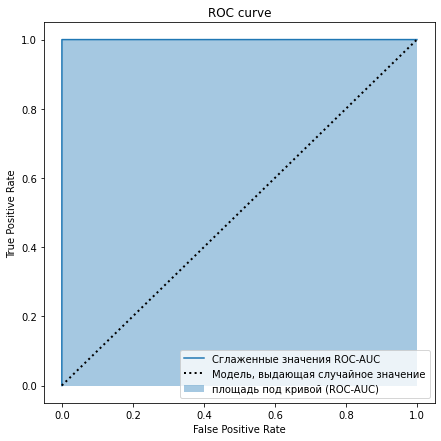

ROC-AUC на тестовой выборке: 0.9998566068412615


In [134]:
#Создаём функцию для подбора лучших параметров модели
def gridSearch(X,y):

    param_dict = {
    "criterion": ['gini', 'entropy'],
    "max_depth" : np.arange(1,10,2),
    "splitter": ['best', 'random'],
    }
    model = DecisionTreeClassifier(random_state=42)
    gv = GridSearchCV(model,param_grid=param_dict,cv=10)
    gv.fit(X,y)
    return gv.best_score_,gv.best_params_


X_train_r = X_train

X_test_r = X_test

#Ищем лучшие параметры
params = gridSearch(X_train_r,y_train)
print(params)

#Строим саму модель
model = DecisionTreeClassifier(random_state=42,
                               criterion = params[1]["criterion"],
                               max_depth =  params[1]["max_depth"],
                               splitter =  params[1]["splitter"])

#Обучаем
model.fit(X_train_r,y_train)
prediction = model.predict(X_test_r)

#Выводим оценку точности
print ("Accuracy : ",accuracy_score(y_test,prediction)*100)
print(classification_report(y_test, prediction))

#Выводим матрицу ошибок
print(confusion_matrix(y_test, prediction))

#Получаем уверенность модели для всех предсказаний    
test_probabilities = model.predict_proba(X_test_r)
test_probabilities = test_probabilities[:, 1]
false_positive_rates, true_positive_rates, threshold = roc_curve(y_test, test_probabilities)

#строим ROC-AUC кривую
plt.figure(figsize=(7, 7))

# рисуем кривую
plt.plot(false_positive_rates, true_positive_rates, label='Сглаженные значения ROC-AUC')

# кривая, соответствующая случайному угадыванию
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle=':', label='Модель, выдающая случайное значение')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.fill_between(false_positive_rates, true_positive_rates, step="mid", alpha=0.4, label='площадь под кривой (ROC-AUC)')
plt.legend()
plt.show()

#Получаем значениие площади под кривой для тестовой выборки
roc_auc_value = roc_auc_score(y_test, test_probabilities)

print("ROC-AUC на тестовой выборке:", roc_auc_value)


print(feture_importants(model.feature_importances_))

Для нормализированных данных

(0.9999284927705314, {'criterion': 'entropy', 'max_depth': 7, 'splitter': 'best'})
Accuracy :  92.45466506492764
              precision    recall  f1-score   support

         0.0       0.98      0.87      0.92     17404
         1.0       0.88      0.98      0.93     17558

    accuracy                           0.92     34962
   macro avg       0.93      0.92      0.92     34962
weighted avg       0.93      0.92      0.92     34962

[[15109  2295]
 [  343 17215]]


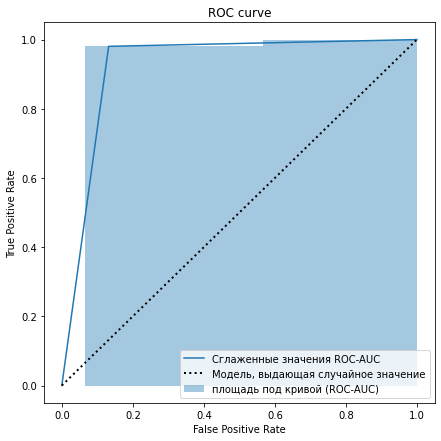

ROC-AUC на тестовой выборке: 0.9242992538843386


In [135]:
#Создаём функцию для подбора лучших параметров модели
def gridSearch(X,y):

    param_dict = {
    "criterion": ['gini', 'entropy'],
    "max_depth" : np.arange(1,10,2),
    "splitter": ['best', 'random'],
    }
    model = DecisionTreeClassifier(random_state=42)
    gv = GridSearchCV(model,param_grid=param_dict,cv=10)
    gv.fit(X,y)
    return gv.best_score_,gv.best_params_

# Нормализуем данные
X_train_s = CustomNormalizer.normalize(X_train)

X_test_s = CustomNormalizer.normalize(X_test)

#Ищем лучшие параметры
params = gridSearch(X_train_s,y_train)
print(params)

#Строим саму модель
model = DecisionTreeClassifier(random_state=42,
                               criterion = params[1]["criterion"],
                               max_depth =  params[1]["max_depth"],
                               splitter =  params[1]["splitter"])

#Обучаем
model.fit(X_train_s,y_train)
prediction = model.predict(X_test_s)

#Выводим оценку точности
print ("Accuracy : ",accuracy_score(y_test,prediction)*100)
print(classification_report(y_test, prediction))

#Выводим матрицу ошибок
print(confusion_matrix(y_test, prediction))

#Получаем уверенность модели для всех предсказаний    
test_probabilities = model.predict_proba(X_test_s)
test_probabilities = test_probabilities[:, 1]
false_positive_rates, true_positive_rates, threshold = roc_curve(y_test, test_probabilities)

#строим ROC-AUC кривую
plt.figure(figsize=(7, 7))

# рисуем кривую
plt.plot(false_positive_rates, true_positive_rates, label='Сглаженные значения ROC-AUC')

# кривая, соответствующая случайному угадыванию
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle=':', label='Модель, выдающая случайное значение')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.fill_between(false_positive_rates, true_positive_rates, step="mid", alpha=0.4, label='площадь под кривой (ROC-AUC)')
plt.legend()
plt.show()

#Получаем значениие площади под кривой для тестовой выборки
roc_auc_value = roc_auc_score(y_test, test_probabilities)

print("ROC-AUC на тестовой выборке:", roc_auc_value)


print(feture_importants(model.feature_importances_))

Для Стандартизированных данных

(0.9999284917478599, {'criterion': 'entropy', 'max_depth': 7, 'splitter': 'best'})
Accuracy :  99.09616154682226
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     17500
         1.0       1.00      0.98      0.99     17462

    accuracy                           0.99     34962
   macro avg       0.99      0.99      0.99     34962
weighted avg       0.99      0.99      0.99     34962

[[17460    40]
 [  276 17186]]


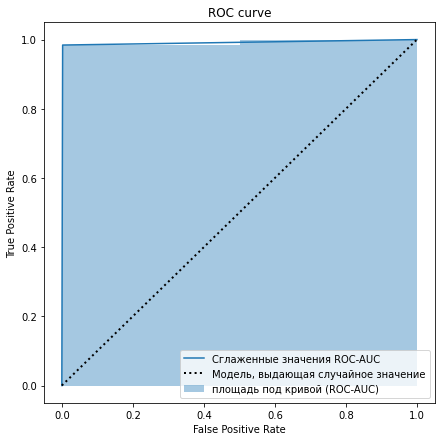

ROC-AUC на тестовой выборке: 0.9909542680432611


In [ ]:
#Создаём функцию для подбора лучших параметров модели
def gridSearch(X,y):

    param_dict = {
    "criterion": ['gini', 'entropy'],
    "max_depth" : np.arange(1,10,2),
    "splitter": ['best', 'random'],
    }
    model = DecisionTreeClassifier(random_state=42)
    gv = GridSearchCV(model,param_grid=param_dict,cv=10)
    gv.fit(X,y)
    return gv.best_score_,gv.best_params_

# Стандартизируем данные
X_train_s = CustomNormalizer.standardize(X_train)

X_test_s = CustomNormalizer.standardize(X_test)

#Ищем лучшие параметры
params = gridSearch(X_train_s,y_train)
print(params)

#Строим саму модель
model = DecisionTreeClassifier(random_state=42,
                               criterion = params[1]["criterion"],
                               max_depth =  params[1]["max_depth"],
                               splitter =  params[1]["splitter"])

#Обучаем
model.fit(X_train_s,y_train)
prediction = model.predict(X_test_s)

#Выводим оценку точности
print ("Accuracy : ",accuracy_score(y_test,prediction)*100)
print(classification_report(y_test, prediction))

#Выводим матрицу ошибок
print(confusion_matrix(y_test, prediction))

#Получаем уверенность модели для всех предсказаний    
test_probabilities = model.predict_proba(X_test_s)
test_probabilities = test_probabilities[:, 1]
false_positive_rates, true_positive_rates, threshold = roc_curve(y_test, test_probabilities)

#строим ROC-AUC кривую
plt.figure(figsize=(7, 7))

# рисуем кривую
plt.plot(false_positive_rates, true_positive_rates, label='Сглаженные значения ROC-AUC')

# кривая, соответствующая случайному угадыванию
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle=':', label='Модель, выдающая случайное значение')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.fill_between(false_positive_rates, true_positive_rates, step="mid", alpha=0.4, label='площадь под кривой (ROC-AUC)')
plt.legend()
plt.show()

#Получаем значениие площади под кривой для тестовой выборки
roc_auc_value = roc_auc_score(y_test, test_probabilities)

print("ROC-AUC на тестовой выборке:", roc_auc_value)

print(feture_importants(model.feature_importances_))

In [147]:
print(feture_importants(model.feature_importances_))

distance_from_home :  0.2556736346227201
distance_from_last_transaction :  0.16374668528258154
ratio_to_median_purchase_price :  0.4289958373416976
repeat_retailer :  0.0029934697631149045
used_chip :  0.03047251715157873
used_pin_number :  0.039057094003859816
online_order :  0.07906076183444742

